In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace = True)

In [6]:
df.sample(5)

,v1,v2
3143,ham,"Haha I heard that, text me when you're around"
5198,ham,She.s fine. I have had difficulties with her p...
4667,ham,IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO
3460,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
266,ham,"Not sure yet, still trying to get a hold of him"


In [7]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.shape

(5169, 2)

### EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

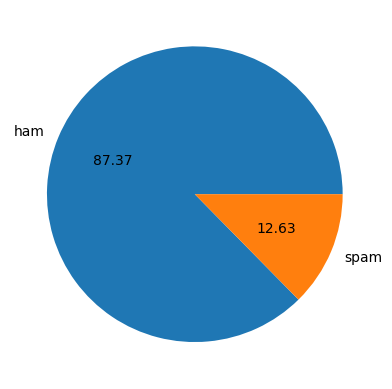

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:


df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
print(nltk.data.path)

['C:\\Users\\DELL/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

df['num_words'] = df['text'].apply(lambda x: len([token.text for token in nlp(x)]))


In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
if not nlp.has_pipe("parser"):
    raise ValueError("SpaCy pipeline missing 'parser', required for sentence segmentation.")

In [25]:

df['num_sentences'] = df['text'].apply(lambda x: len([sent for sent in nlp(str(x)).sents]))


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.100987
std,58.236293,13.175170,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,27.000000


In [28]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [29]:


#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

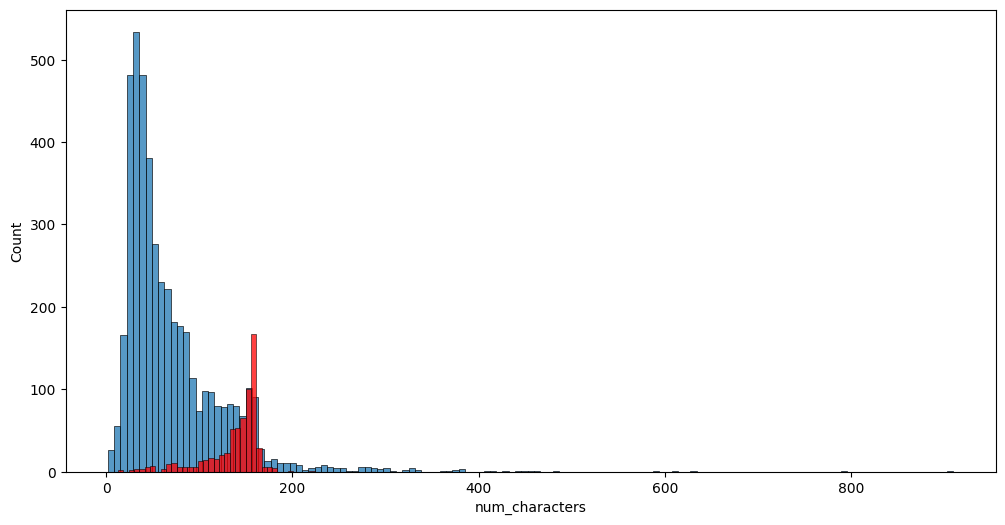

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

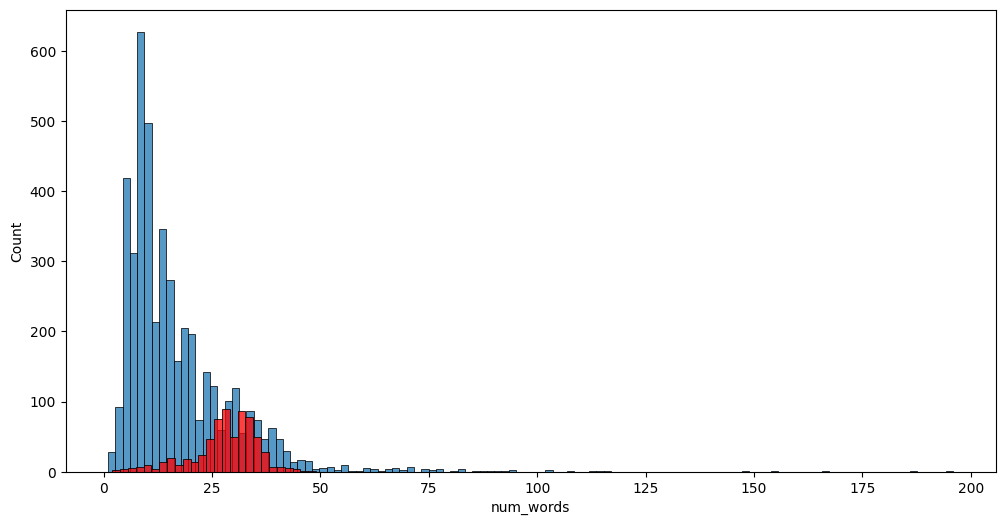

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

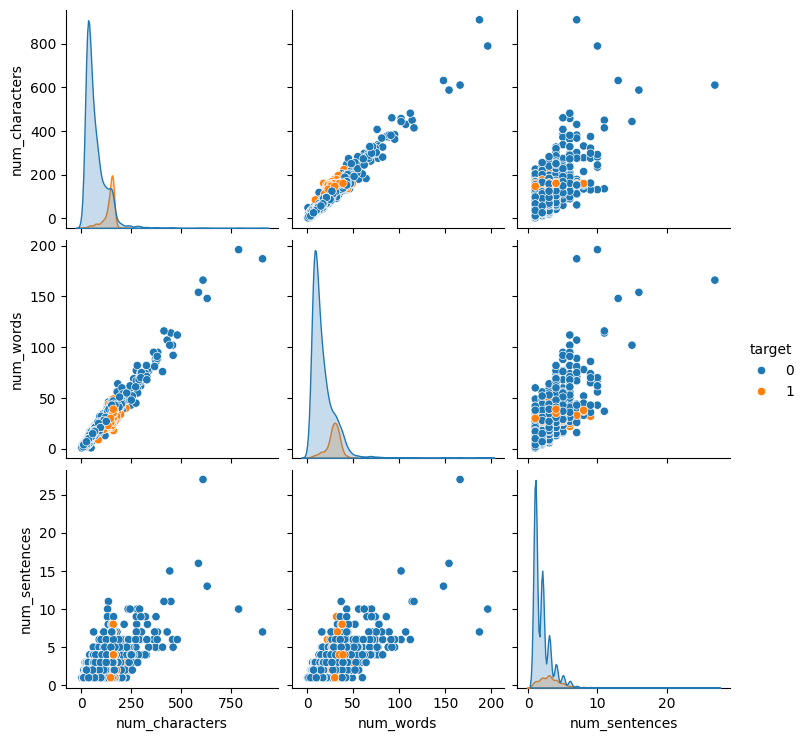

In [33]:

sns.pairplot(df,hue='target')

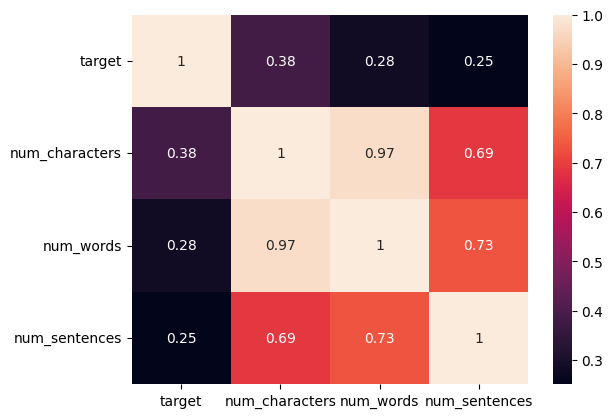

In [34]:
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation and plot
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [35]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
def transform_text(text):
    doc = nlp(text.lower())  # lowercase and process
    words = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(words)


In [37]:
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."

# Process the text
doc = nlp(text)

# Word tokenization
words = [token.text for token in doc]
print("Words:", words)

# Sentence tokenization
sentences = [sent.text for sent in doc.sents]
print("Sentences:", sentences)

Words: ['I', "'m", 'gon', 'na', 'be', 'home', 'soon', 'and', 'I', 'do', "n't", 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', ',', 'k', '?', 'I', "'ve", 'cried', 'enough', 'today', '.']
Sentences: ["I'm gonna be home soon", "and I don't want to talk about this stuff anymore tonight, k?", "I've cried enough today."]


In [38]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:


df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

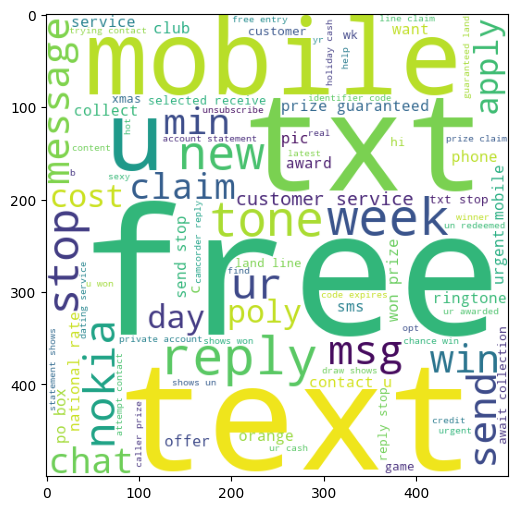

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

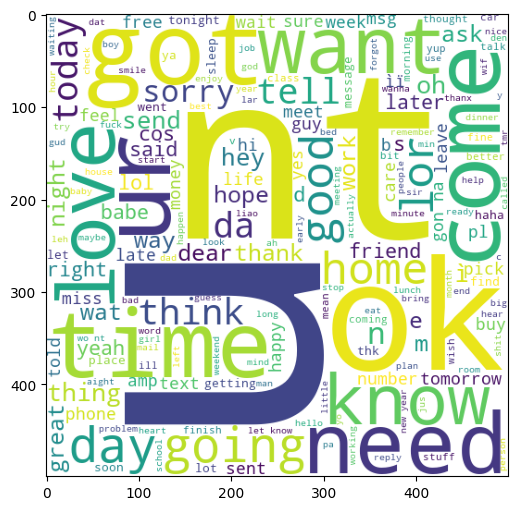

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

7582

C:\Users\DELL\AppData\Local\Temp\ipykernel_15128\1148350803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=0, y=1, data=df_spam, palette='viridis')  # 0 = word, 1 = count


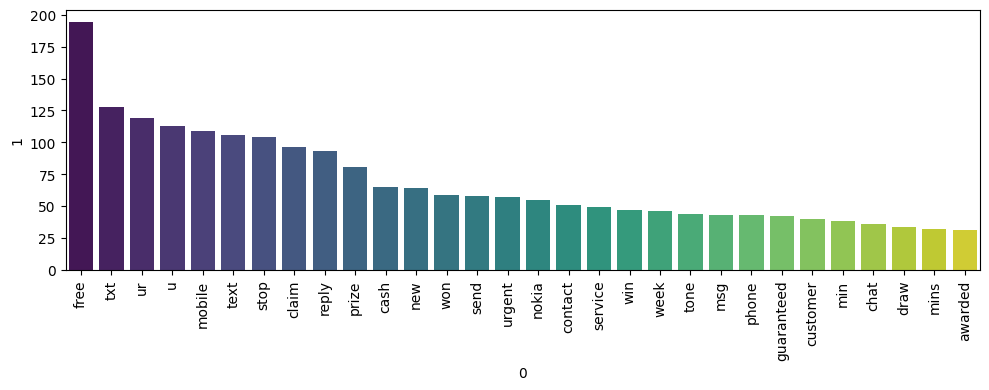

In [59]:
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot using column index positions
plt.figure(figsize=(10, 4))
sns.barplot(x=0, y=1, data=df_spam, palette='viridis')  # 0 = word, 1 = count
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

29879

C:\Users\DELL\AppData\Local\Temp\ipykernel_15128\2837841514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=0, y=1, data=df_spam, palette='viridis')  # 0 = word, 1 = count


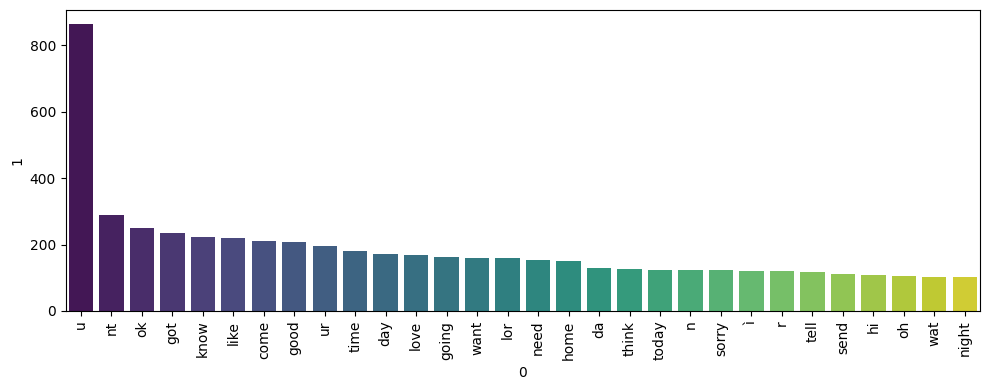

In [60]:

from collections import Counter
df_spam = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plot using column index positions
plt.figure(figsize=(10, 4))
sns.barplot(x=0, y=1, data=df_spam, palette='viridis')  # 0 = word, 1 = count
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives


### Model Building

In [63]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:

X.shape

(5169, 3000)

In [66]:
y = df['target'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[777 119]
 [ 26 112]]
0.48484848484848486


In [72]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[892   4]
 [ 19 119]]
0.967479674796748


In [78]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [82]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.957983193277311)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.957983193277311
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9187620889748549
Precision -  0.8375
For  LR
Accuracy -  0.9458413926499033
Precision -  0.9270833333333334
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.8965183752417795
Precision -  0.8974358974358975
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.9016393442622951
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9342359767891683
Precision -  0.9375
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9649122807017544


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
2,NB,0.970019,1.000000
8,ETC,0.974855,0.974576
5,RF,0.971954,0.973913
10,xgb,0.969052,0.964912
0,SVC,0.971954,0.957983
9,GBDT,0.934236,0.937500
4,LR,0.945841,0.927083
7,BgC,0.961315,0.901639
6,AdaBoost,0.896518,0.897436


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911025
1,NB,Accuracy,0.970019
2,ETC,Accuracy,0.974855
3,RF,Accuracy,0.971954
4,xgb,Accuracy,0.969052
5,SVC,Accuracy,0.971954
6,GBDT,Accuracy,0.934236
7,LR,Accuracy,0.945841
8,BgC,Accuracy,0.961315
9,AdaBoost,Accuracy,0.896518


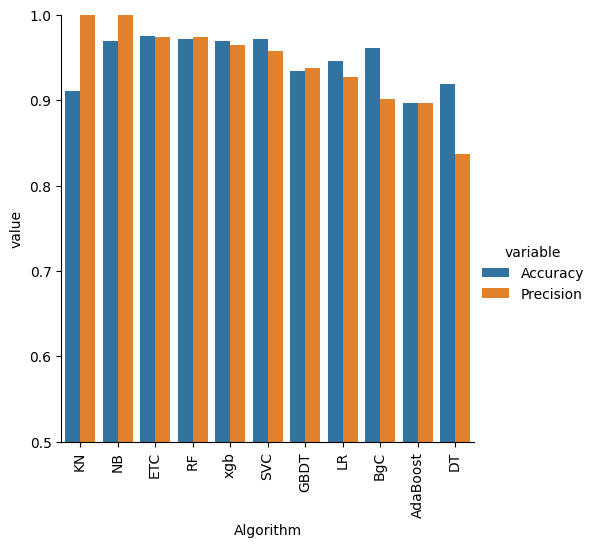

In [89]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [95]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,RF,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913
4,xgb,0.969052,0.964912,0.969052,0.964912,0.969052,0.964912,0.969052,0.964912
5,SVC,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983
6,GBDT,0.934236,0.937500,0.934236,0.937500,0.934236,0.937500,0.934236,0.937500
7,LR,0.945841,0.927083,0.945841,0.927083,0.945841,0.927083,0.945841,0.927083
8,BgC,0.961315,0.901639,0.961315,0.901639,0.961315,0.901639,0.961315,0.901639
9,AdaBoost,0.896518,0.897436,0.896518,0.897436,0.896518,0.897436,0.896518,0.897436


In [96]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [98]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.959349593495935


In [100]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [101]:
from sklearn.ensemble import StackingClassifier

In [102]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9457364341085271


In [104]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))